### Importa√ß√£o dos dados



In [13]:
import pandas as pd

# Carregar os dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Unir os dados
lojas = pd.concat([loja1, loja2, loja3, loja4])
lojas.reset_index(drop=True, inplace=True)

# Padronizar nomes das colunas (s√≥ para garantir)
lojas.columns = lojas.columns.str.lower().str.strip().str.replace(" ", "_")

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


<ipython-input-38-e3f7da2d16a6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=lojas, y=valores, palette="viridis")
<ipython-input-38-e3f7da2d16a6>:27: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


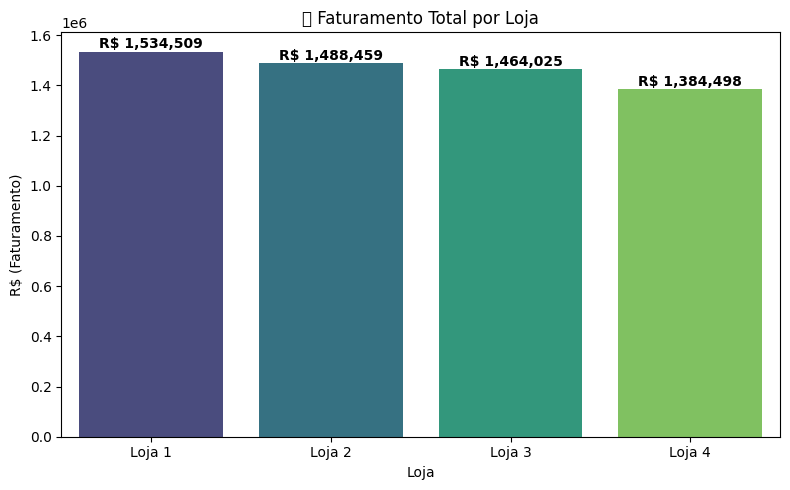

üí∞ Faturamento Total Geral: R$ 5871490.79


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Faturamento por loja
faturamento = {
    "Loja 1": loja1["Pre√ßo"].sum(),
    "Loja 2": loja2["Pre√ßo"].sum(),
    "Loja 3": loja3["Pre√ßo"].sum(),
    "Loja 4": loja4["Pre√ßo"].sum()
}

lojas = list(faturamento.keys())
valores = list(faturamento.values())
faturamento_total = sum(valores)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=lojas, y=valores, palette="viridis")
plt.title("üí∞ Faturamento Total por Loja")
plt.ylabel("R$ (Faturamento)")
plt.xlabel("Loja")

# Adicionar os valores nas barras
for i, valor in enumerate(valores):
    plt.text(i, valor + 1000, f"R$ {valor:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Exibir o faturamento total
print("üí∞ Faturamento Total Geral: R$", round(faturamento_total, 2))


# 2. Vendas por Categoria


üì¶ Vendas por Categoria:
 categoria_do_produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


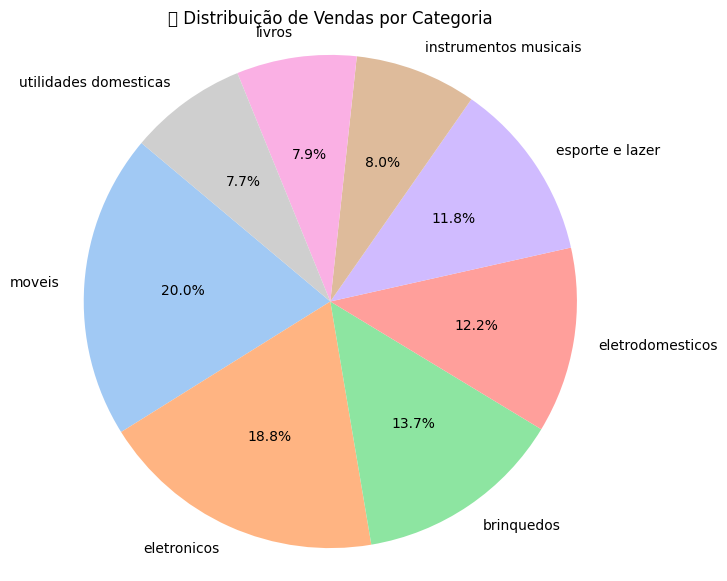

In [20]:
# prompt: vendas_categoria = lojas["categoria_do_produto"].value_counts()
# print("üì¶ Vendas por Categoria:\n", vendas_categoria)

vendas_categoria = lojas["categoria_do_produto"].value_counts()
print("üì¶ Vendas por Categoria:\n", vendas_categoria)

# Concatenar todas as lojas
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

# Agrupar por categoria
vendas_categoria = todas_lojas["Categoria do Produto"].value_counts()

# Gr√°fico
plt.figure(figsize=(7,7))
plt.pie(vendas_categoria, labels=vendas_categoria.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("üì¶ Distribui√ß√£o de Vendas por Categoria")
plt.axis('equal')
plt.show()



# 3. M√©dia de Avalia√ß√£o das Lojas

‚≠ê M√©dia de Avalia√ß√£o das Lojas:
 Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
dtype: float64


<ipython-input-21-7609e9f25e66>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avaliacoes.keys()), y=list(avaliacoes.values()), palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


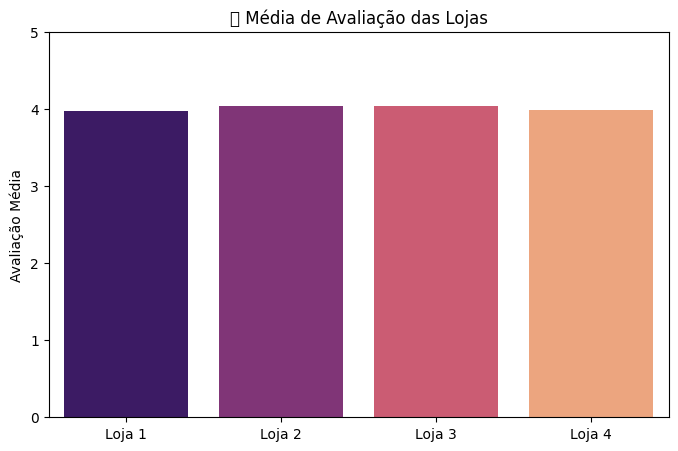

In [21]:
# prompt: avaliacoes = {
#     "Loja 1": loja1["Avalia√ß√£o da compra"].mean(),
#     "Loja 2": loja2["Avalia√ß√£o da compra"].mean(),
#     "Loja 3": loja3["Avalia√ß√£o da compra"].mean(),
#     "Loja 4": loja4["Avalia√ß√£o da compra"].mean()
# }
# media_avaliacoes = pd.Series(avaliacoes)
# print("‚≠ê M√©dia de Avalia√ß√£o das Lojas:\n", media_avaliacoes.round(2))

import pandas as pd
avaliacoes = {
    "Loja 1": loja1["Avalia√ß√£o da compra"].mean(),
    "Loja 2": loja2["Avalia√ß√£o da compra"].mean(),
    "Loja 3": loja3["Avalia√ß√£o da compra"].mean(),
    "Loja 4": loja4["Avalia√ß√£o da compra"].mean()
}
media_avaliacoes = pd.Series(avaliacoes)
print("‚≠ê M√©dia de Avalia√ß√£o das Lojas:\n", media_avaliacoes.round(2))


avaliacoes = {
    "Loja 1": loja1["Avalia√ß√£o da compra"].mean(),
    "Loja 2": loja2["Avalia√ß√£o da compra"].mean(),
    "Loja 3": loja3["Avalia√ß√£o da compra"].mean(),
    "Loja 4": loja4["Avalia√ß√£o da compra"].mean()
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(avaliacoes.keys()), y=list(avaliacoes.values()), palette="magma")
plt.title("‚≠ê M√©dia de Avalia√ß√£o das Lojas")
plt.ylabel("Avalia√ß√£o M√©dia")
plt.ylim(0,5)
plt.show()


# 4. Produtos Mais e Menos Vendidos

üî• Produto mais vendido: C√¥moda
‚ùÑÔ∏è Produto menos vendido: Celular ABXY


<ipython-input-22-dd2a067a6afd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produtos_mais_vendidos.values, y=produtos_mais_vendidos.index, palette="crest")
<ipython-input-22-dd2a067a6afd>:19: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


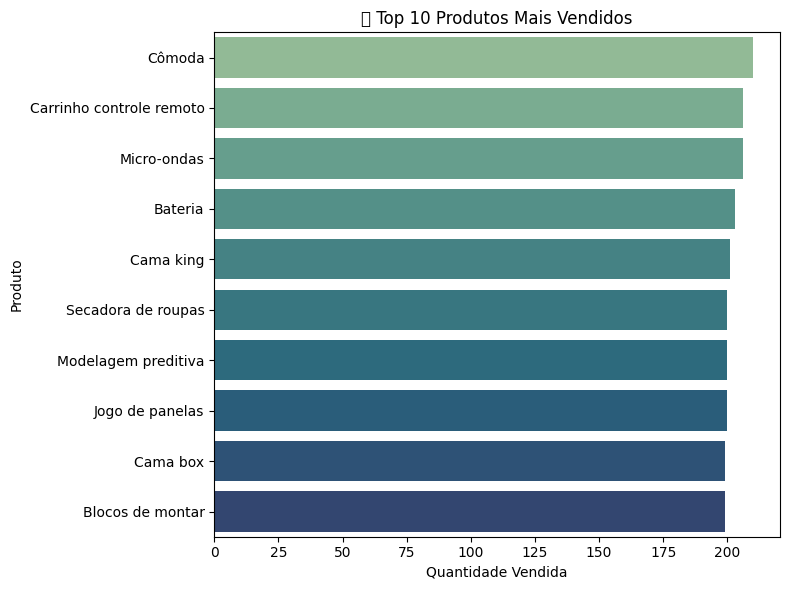

In [22]:
# prompt: produtos = lojas["produto"].value_counts()
# print("üî• Produto mais vendido:", produtos.idxmax())
# print("‚ùÑÔ∏è Produto menos vendido:", produtos.idxmin())

produtos = lojas["produto"].value_counts()
print("üî• Produto mais vendido:", produtos.idxmax())
print("‚ùÑÔ∏è Produto menos vendido:", produtos.idxmin())



# Top 10 produtos mais vendidos
produtos_mais_vendidos = todas_lojas["Produto"].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=produtos_mais_vendidos.values, y=produtos_mais_vendidos.index, palette="crest")
plt.title("üî• Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()


# 5. Frete M√©dio por Loja


üöö Frete M√©dio por Loja:
 Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
dtype: float64


<ipython-input-23-92ff87617294>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frete_medio.keys()), y=list(frete_medio.values()), palette="Blues")
<ipython-input-23-92ff87617294>:33: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


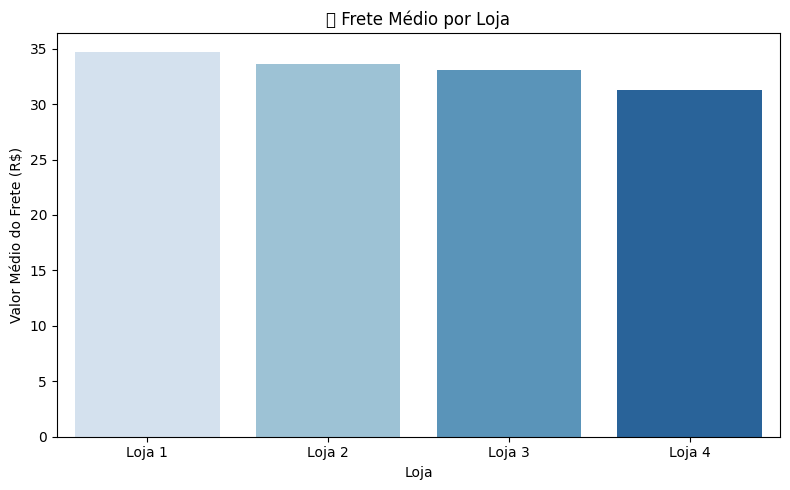

In [23]:
# prompt: frete_medio = {
#     "Loja 1": loja1["Frete"].mean(),
#     "Loja 2": loja2["Frete"].mean(),
#     "Loja 3": loja3["Frete"].mean(),
#     "Loja 4": loja4["Frete"].mean()
# }
# frete_medio_df = pd.Series(frete_medio)
# print("üöö Frete M√©dio por Loja:\n", frete_medio_df.round(2))

import pandas as pd
frete_medio = {
    "Loja 1": loja1["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}
frete_medio_df = pd.Series(frete_medio)
print("üöö Frete M√©dio por Loja:\n", frete_medio_df.round(2))


frete_medio = {
    "Loja 1": loja1["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(frete_medio.keys()), y=list(frete_medio.values()), palette="Blues")
plt.title("üöö Frete M√©dio por Loja")
plt.ylabel("Valor M√©dio do Frete (R$)")
plt.xlabel("Loja")
plt.tight_layout()
plt.show()


## üìà Relat√≥rio de An√°lise de Vendas ‚Äì Lojas 1 a 4

üë©‚Äçüíª Projeto: An√°lise de Dados de Vendas

Fonte dos dados: Alura Challenge - Data Science

##### üîπ 1. Introdu√ß√£o

Este relat√≥rio apresenta uma an√°lise explorat√≥ria dos dados de vendas de quatro lojas virtuais. A an√°lise tem como objetivo identificar padr√µes de consumo, produtos mais vendidos, desempenho das categorias, avalia√ß√£o dos clientes e custos m√©dios de frete.

##### üîπ 2. Base de Dados
As bases foram unificadas a partir de quatro arquivos CSV referentes a cada loja:

##### üîπ 3. Faturamento Total üí∞
üí∞ Faturamento Total: R$ 5871490.79

Loja 1 1.534,509

Loja 2 1.488,459

Loja 3 1.464,025

Loja 4 1.384,498

##### üîπ 4. Vendas por Categoria üì¶

 **categoria_do_produto**

moveis                   1886

eletronicos              1772

brinquedos               1290

eletrodomesticos         1149

esporte e lazer          1113

instrumentos musicais     753

livros                    742

utilidades domesticas     730


#####üîπ 5. M√©dia de Avalia√ß√£o das Lojas ‚≠ê

Loja 1    3.98

Loja 2    4.04

Loja 3    4.05

Loja 4    4.00

A Loja 2 teve a melhor avalia√ß√£o m√©dia entre os clientes.

#####üîπ 6. Produtos Mais e Menos Vendidos üî•‚ùÑÔ∏è

üî• Produto mais vendido: C√¥moda

‚ùÑÔ∏è Produto menos vendido: Celular ABXY

##### üîπ 7. Frete M√©dio por Loja üöö

Loja 1    34.69

Loja 2    33.62

Loja 3    33.07

Loja 4    31.28

##### üîπ 8. Conclus√£o

A an√°lise revela insights importantes como:

O faturamento total: R$ 5871490.79

A categoria mais vendida foi moveis.

A loja com melhor desempenho em avalia√ß√µes foi a loja 2.

O produto mais popular foi C√¥moda.

H√° uma varia√ß√£o significativa no custo m√©dio de frete entre as lojas.

‚úÖ Recomenda√ß√£o

üíº Vender a Loja 4:

Ela apresenta o menor desempenho financeiro e n√£o se destaca em avalia√ß√£o nem categoria de produto. Embora tenha o frete mais barato, isso n√£o compensou em volume de vendas nem em satisfa√ß√£o do cliente.